In [2]:
# Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [4]:
# Plan 1 - Dados para treinar o modelo
Base_Dados = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

# Plan 2 - Novas entradas


In [6]:
Base_Dados.head()

# 1 = Não usou
# 2 = Serviço
# 3 = Furto

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [7]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [8]:
Base_Dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


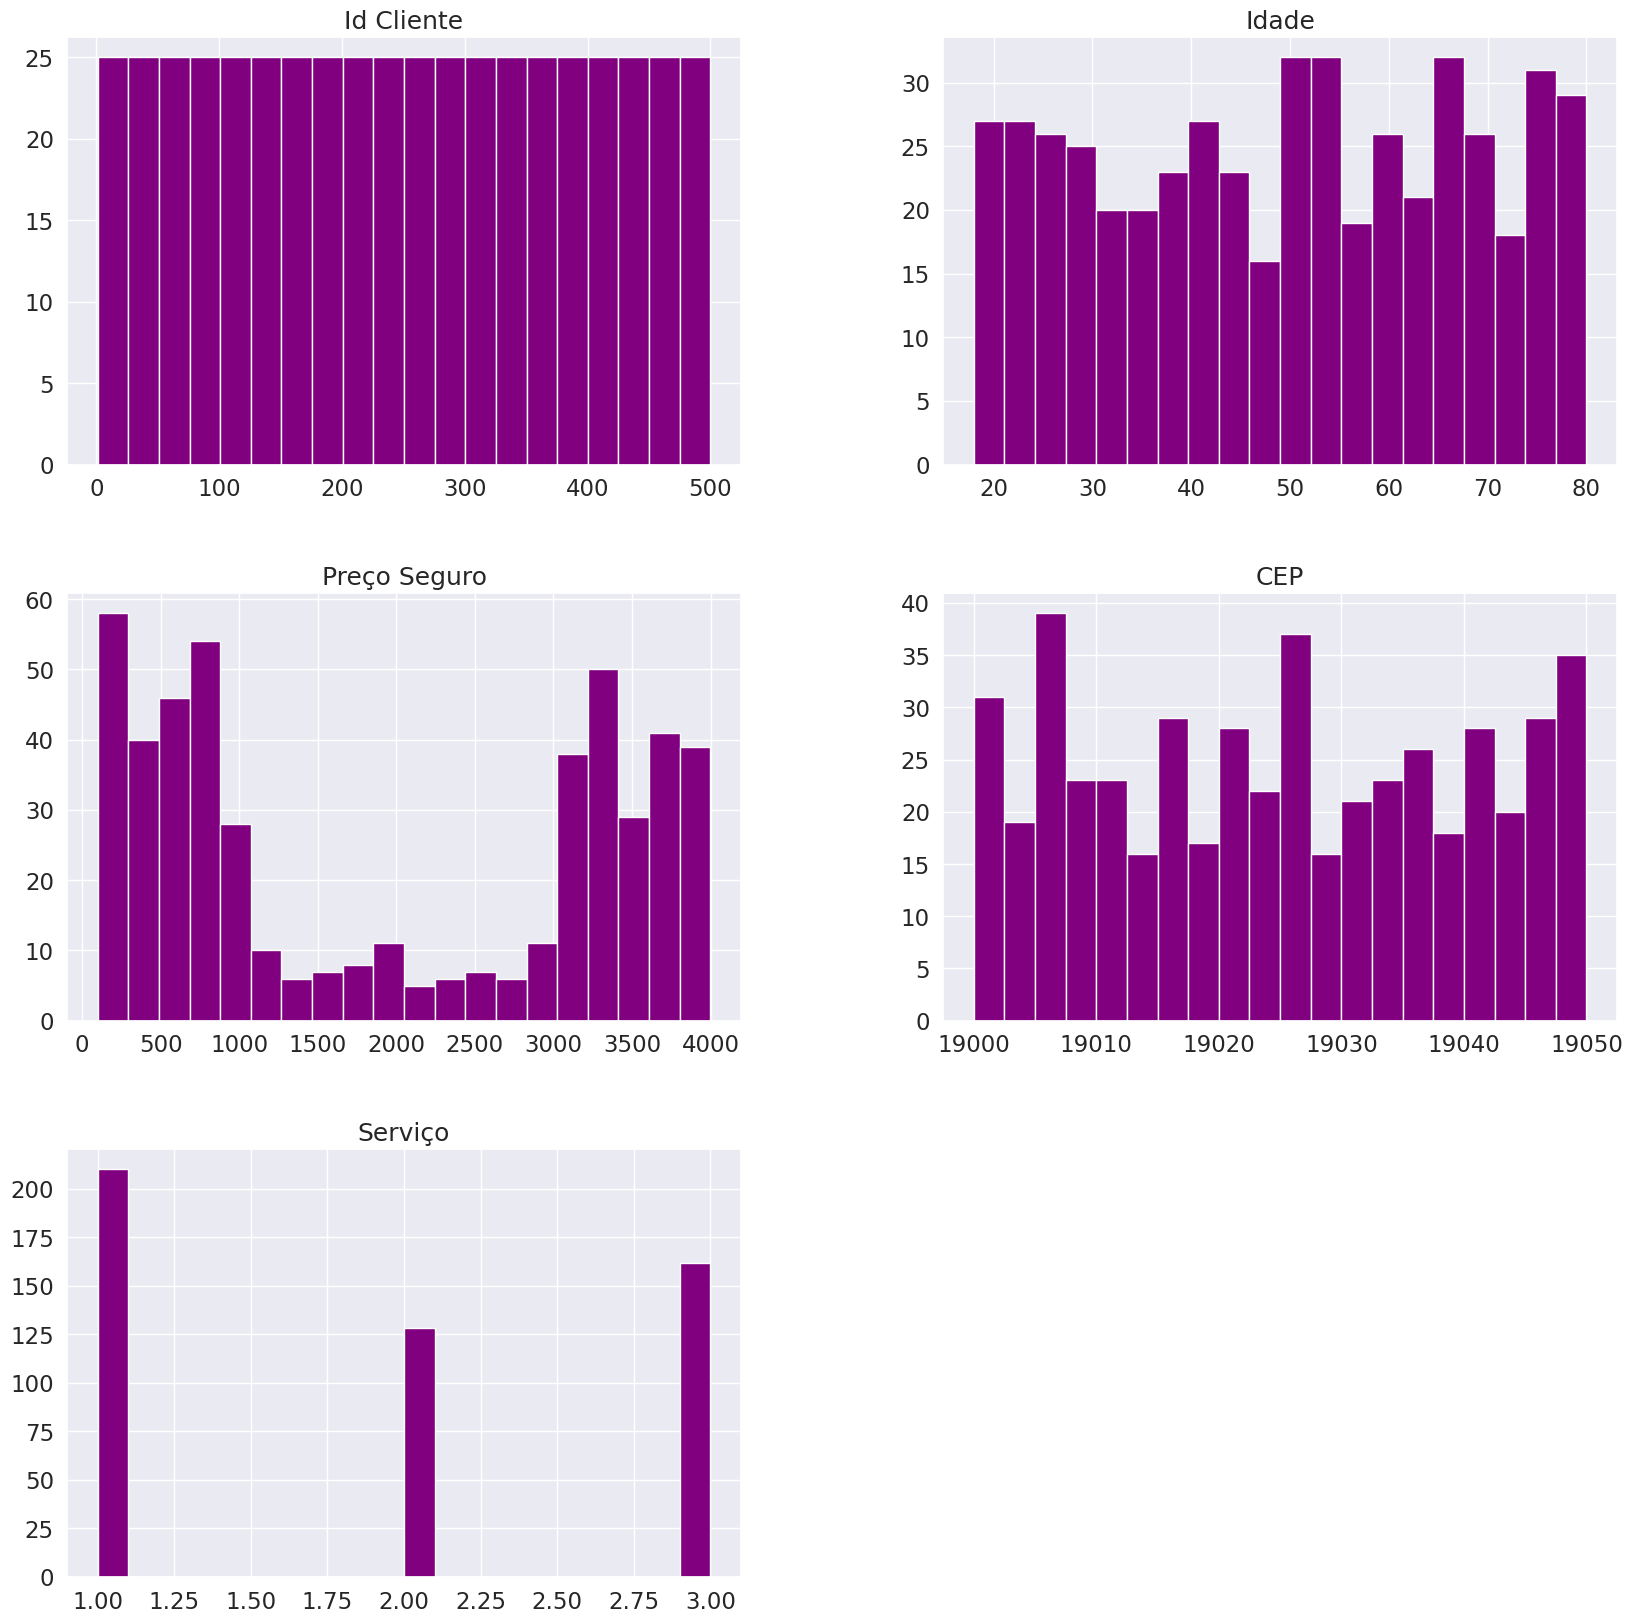

In [9]:
sns.set( font_scale=1.5,rc={ 'figure.figsize':(20,20)})
eixo = Base_Dados.hist( bins=20, color='purple' )

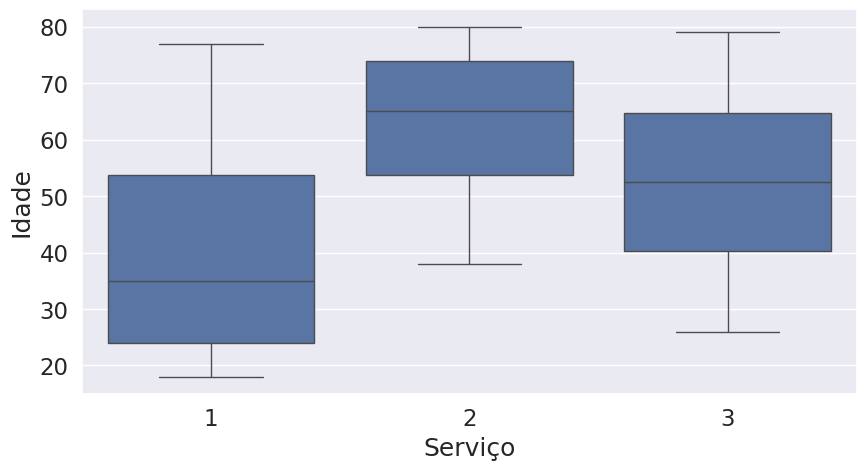

In [11]:
plt.figure( figsize=(10,5) )
sns.boxplot( data=Base_Dados, x='Serviço', y='Idade');

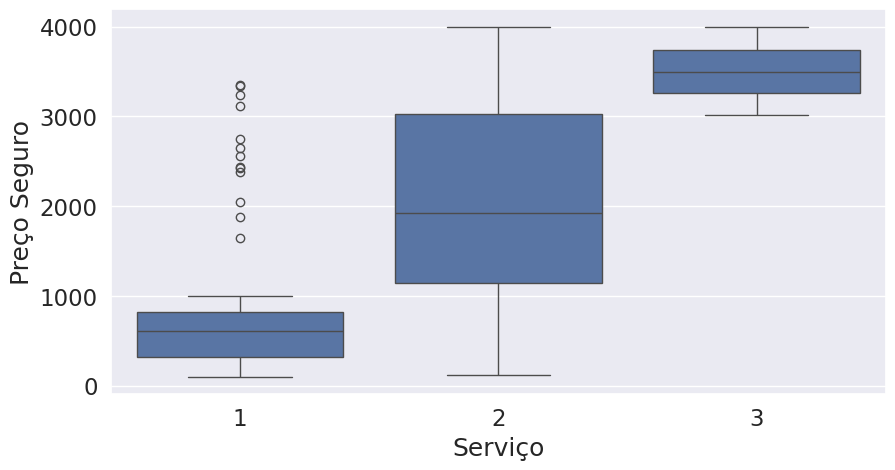

In [12]:
plt.figure( figsize=(10,5) )
sns.boxplot( data=Base_Dados, x='Serviço', y='Preço Seguro');

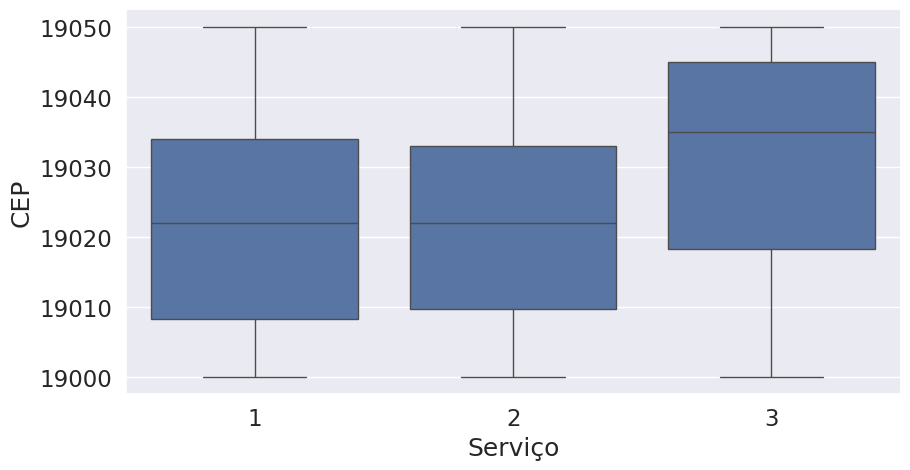

In [13]:
plt.figure( figsize=(10,5) )
sns.boxplot( data=Base_Dados, x='Serviço', y='CEP');

In [14]:
Caracteristicas = Base_Dados.iloc[:,1:4].values
Previsor = Base_Dados.iloc[:,4:5]

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    Caracteristicas,
    Previsor,
    test_size=0.30,
    random_state=10
)

print(len(Base_Dados))
print(len(x_treinamento))
print(len(x_teste))

500
350
150


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
Algoritmo_floresta_aleatoria = RandomForestClassifier( n_estimators=500 )

Algoritmo_floresta_aleatoria.fit( x_treinamento, y_treinamento )

<ipython-input-20-7bb5f3614805>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Algoritmo_floresta_aleatoria.fit( x_treinamento, y_treinamento )


RandomForestClassifier(n_estimators=500)

In [21]:
Previsoes = Algoritmo_floresta_aleatoria.predict(x_teste)

In [22]:
from sklearn.metrics import confusion_matrix

[[60  3  1]
 [ 6 22  8]
 [ 0  1 49]]


<Axes: >

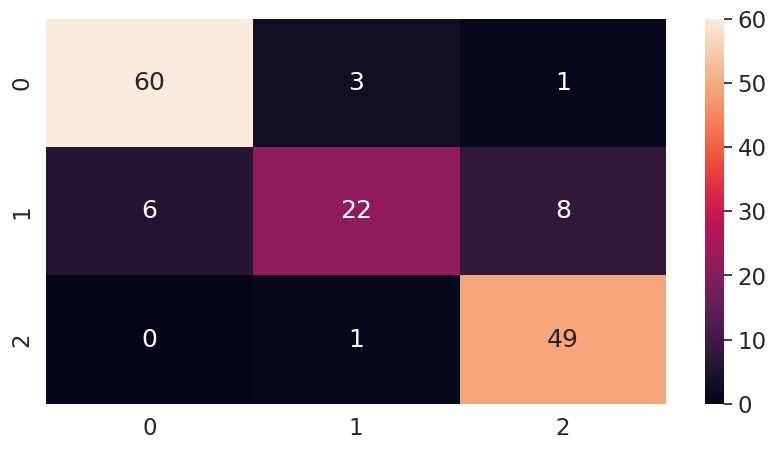

In [24]:
Matriz_Confusao = confusion_matrix( y_teste, Previsoes)

print(Matriz_Confusao)

plt.figure( figsize=(10,5))
sns.heatmap( Matriz_Confusao, annot=True )

In [25]:
from sklearn.metrics import classification_report

In [26]:
report = classification_report( y_teste, Previsoes )
print( report )

              precision    recall  f1-score   support

           1       0.91      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.98      0.91        50

    accuracy                           0.87       150
   macro avg       0.87      0.84      0.85       150
weighted avg       0.87      0.87      0.87       150



In [27]:
Novas_Vendas = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')

In [28]:
Novas_Vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [30]:
Prever = Novas_Vendas.iloc[:,1:4].values

Novas_Vendas['Previsão do Modelo'] = Algoritmo_floresta_aleatoria.predict( Prever )

In [31]:
Novas_Vendas

,Id Cliente,Idade,Preço Seguro,CEP,Previsão do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1


In [32]:
Novas_Vendas['Previsão do Modelo'].value_counts()

Previsão do Modelo
1    15
2     5
3     1
Name: count, dtype: int64